# Homework Assignment #3
## Forecasting COVID-19 Cases in Houston Area

Due: 9AM Dec 7, 2020

**Data Source**: A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the COVID-19 data for Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_covid.csv

1. Read in the data and focus on new confirmed cases under the column new_confirm.

2. Carry out seasonality decomposition for the new confirmed cases and plot them out.

3. Build an ARIMA model with an optimal order (p, d, q)

4. Make a prediction for next 10 days, plot it out, and explain your results.

The finished homework must be in forms of a Jupyter notebook that is executable on Google Colab.

## 1. Download and Read in Data

In [1]:
COVID19_DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_covid.csv"

In [2]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(COVID19_DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df=df["new_confirm"]

In [4]:
df

date
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
             ... 
2021-10-14    660
2021-10-15    949
2021-10-16    289
2021-10-17    424
2021-10-18    229
Name: new_confirm, Length: 635, dtype: int64

In [5]:
df.describe().T

count      635.000000
mean       897.840945
std       1189.124616
min       -345.000000
25%        197.500000
50%        569.000000
75%       1206.000000
max      14129.000000
Name: new_confirm, dtype: float64

In [6]:
df_filled=df.bfill().ffill()

In [7]:
df_filled

date
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
             ... 
2021-10-14    660
2021-10-15    949
2021-10-16    289
2021-10-17    424
2021-10-18    229
Name: new_confirm, Length: 635, dtype: int64

<AxesSubplot:xlabel='date'>

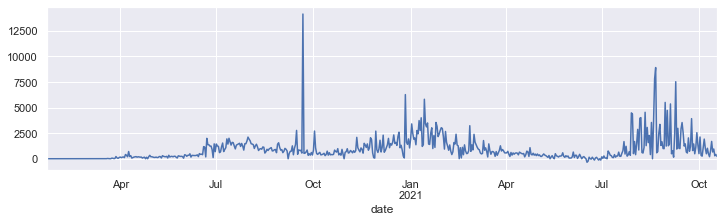

In [8]:
df.plot(figsize=(12,3))

In [9]:
np.argmax(df.values)

242

In [10]:
df.values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     2,     1,     2,
           0,     1,     0,     1,     2,     0,     2,     0,     2,
           3,     7,     7,    25,    13,     6,     4,    56,    51,
          18,    26,   216,    81,    37,   117,   167,   108,   151,
         178,   111,   414,   337,   195,   706,   214,   300,    68,
         115,   163,   190,   209,   154,   193,   170,   154,   166,
          68,   119,   152,     0,   146,     0,   199,   334,   195,
         195,   157,   130,   129,   161,   116,   133,   217,   209,
          75,   298,   240,   205,   196,   233,    76,   339,   170,
         224,   236,   188,   243,   244,   151,    74,   286,   261,
         228,   239,

In [11]:
df.values[242]=df.values[241]

We will need to remove the outlier to continue with further analysis. There are many ways to carry out outlier detection and correction. For this homework, please find the row of the outlier and replace it with

`df.values[INDEX]= df.values[INDEX+1]` or `df.values[INDEX]= df.values[INDEX-1]`

Hint: `numpy` has a function `argmax` that returns the index of the maximum element.

## 2. Decomposition with statsmodels module



In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)

The results could be directly plotted with the plot method.

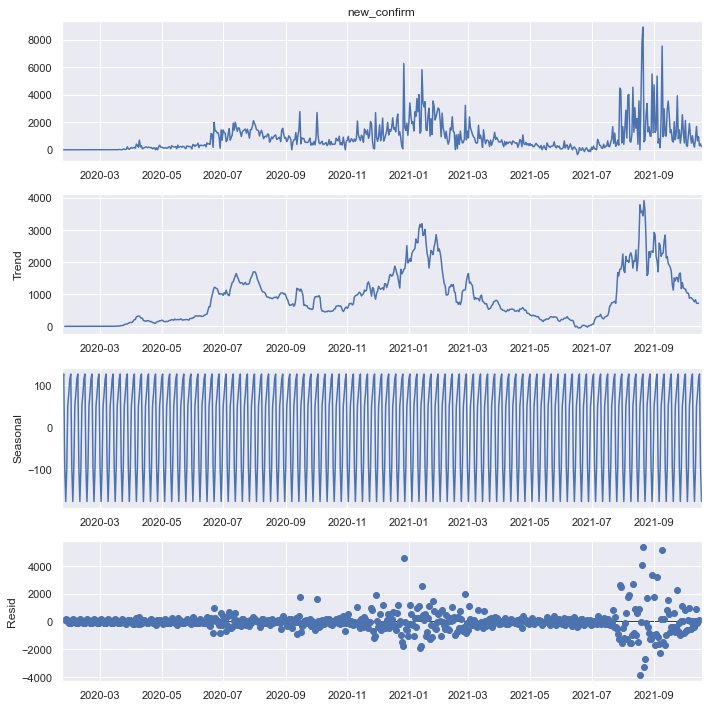

In [13]:
# enlarge the figure to make it easy to see the details.
sns.set(rc={'figure.figsize':(10,10)})
result.plot();

## 3. Difference the time series

Confirm the stationarity of the new time series with KPSS and ADF tests.

In [14]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [15]:
df_filled['Month'] = df_filled.index.month

In [16]:
df_filled

date
2020-01-23 00:00:00                                                    0
2020-01-24 00:00:00                                                    0
2020-01-25 00:00:00                                                    0
2020-01-26 00:00:00                                                    0
2020-01-27 00:00:00                                                    0
                                             ...                        
2021-10-15 00:00:00                                                  949
2021-10-16 00:00:00                                                  289
2021-10-17 00:00:00                                                  424
2021-10-18 00:00:00                                                  229
Month                  Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1...
Name: new_confirm, Length: 636, dtype: object

You can try different resampling period here based on the prediction that you need to make. For instance, you might not want to use "m" to predict new case on a certain day in the future.

In [17]:
X = df.resample('d').mean().diff(periods=1).values[1:]

## 4. Contruct an ARIMA model with an optimal order to make predictions

You may find the following function conveninent.

In [18]:
# data  : the train data in forms of numpy array
# order : the maximum order of p, d, q for the grid search
# return: optimal (p, d, q)

# example: myorder = arima_order(X_train)

def arima_order(data, order=10, verbose=True):
  import warnings
  import itertools
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, rmodel_arima_fit.aic})
    except:
      continue
  return min_order

In [19]:
X = df.resample('d').mean().diff(periods=1).values[1:]

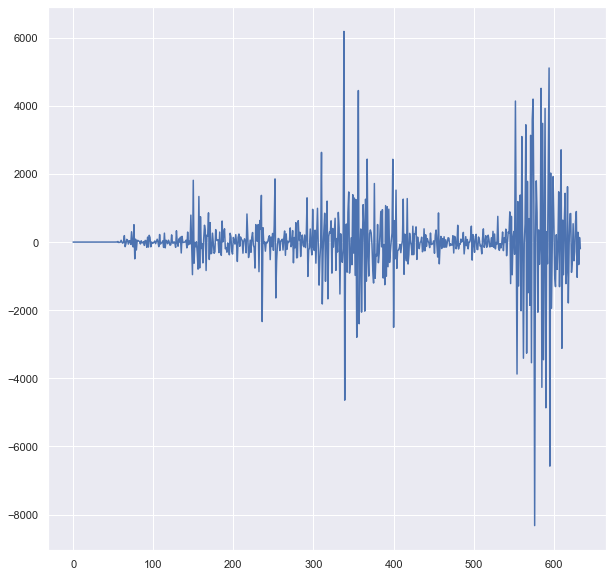

In [20]:
plt.plot(X)

In [21]:
#X_train, X_test = train_test_split(X, test_size=0.20, random_state=42)
X_train = X[:40319]
X_test = X[40319:]

In [22]:
X.shape

(634,)

In [23]:
X_train.shape

(634,)

In [24]:
X_test.shape

(0,)

In [25]:
model_ar = AR(X_train)

/Users/zacblackburn/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN,

In [26]:
model_ar_fit = model_ar.fit()

In [27]:
#X_train, X_test = train_test_split(X, test_size=0.20, random_state=42)
X_train = X[:40319]
X_test = X[40319:]

In [28]:
# ARIMA needs three parameters: p, d, q.
# p = periods taken for autoregressive model
# d = integrated order, difference
# q = periods in moving average model
model_arima = ARIMA(X_train, order=(2, 1, 2))
model_arima_fit=model_arima.fit()

/Users/zacblackburn/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [1]:
n_pred = 10 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast 
pred_array, se_array, CI_array = model_arima_fit.forecast(steps=n_pred,alpha=0.03) # alpha: confidence level
plt.figure(figsize=(12,4))
pred_array_index = range(40319, 40419)
plt.plot(pred_array_index, X_test[:100])
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .03 )
plt.title('Forecast of the simulated data')
plt.show()

NameError: ignored